# Определение причин убытков развлекательного приложения

## Описание проекта:

**Цель: разобраться в причинах убытков развлекательного приложения.**

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

    лог сервера с данными об их посещениях,
    выгрузка их покупок за этот период,
    рекламные расходы.
    
### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Загрузка данных и подготовка их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

## Подключение библиотек

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore') # отключаем предупреждения

## Загрузка данных и получение общей информации

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
def inspect (df):
    display(df.sample(n = 5, random_state = 5)) #посмотрим случайные строки
    df.info() # получение общей информации о данных в таблице df
    print ('Количество дубликатов - ' + str(df.duplicated().sum()))

###  Таблица с логами сервера с информацией о посещениях сайта

In [4]:
inspect(visits)

,User Id,Region,Device,Channel,Session Start,Session End
137268,78915550187,United States,iPhone,organic,2019-09-07 03:47:53,2019-09-07 04:13:09
45131,872135349411,United States,Android,TipTop,2019-06-17 00:57:48,2019-06-17 02:17:24
218467,358845433585,France,Mac,lambdaMediaAds,2019-05-23 18:30:32,2019-05-23 18:46:21
127621,709590033784,United States,Android,organic,2019-08-30 07:30:13,2019-08-30 08:32:50
37962,485478694868,United States,Mac,RocketSuperAds,2019-06-09 02:42:11,2019-06-09 02:52:37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
Количество дубликатов - 0


Выводы:
- в названиях строчные буквы сочетаются с прописными и пробелами, это необходимо будет исправить
- необходимо изменить типы данных в колонках Session Start	и Session End для работы с датой
- дубликаты и пропуски отсутствуют

### Таблица с информацией о покупках

In [5]:
inspect(orders)

,User Id,Event Dt,Revenue
1035,615727753979,2019-05-19 15:21:57,4.99
11158,351139270506,2019-08-06 01:28:43,4.99
32958,855370769516,2019-08-12 03:15:04,4.99
37102,838887195060,2019-09-30 03:20:34,4.99
4554,806665855938,2019-06-23 23:48:05,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
Количество дубликатов - 0


Выводы:
- в названиях строчные буквы сочетаются с прописными и пробелами, это необходимо будет исправить
- необходимо изменить типы данных в колонке Event Dt для работы с датой
- дубликаты и пропуски отсутствуют

### Таблица с информацией о расходах на рекламу

In [6]:
inspect(costs)

,dt,Channel,costs
117,2019-08-26,FaceBoom,193.60
836,2019-08-25,YRabbit,5.04
33,2019-06-03,FaceBoom,159.50
208,2019-05-29,MediaTornado,5.52
1657,2019-06-07,lambdaMediaAds,4.80


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
Количество дубликатов - 0


Выводы:
- в названии 1 колонки строчные буквы сочетаются с прописными, это необходимо будет исправить
- типы данных менять не нужно
- дубликаты и пропуски отсутствуют

### Подготовка данных к анализу.

In [7]:
# приводим к строчным буквам и убираем пробелы
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values] 
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

In [8]:
# попробовала сделать замену формата дат циклом
cols = ['session_start', 'session_end', 'event_dt', 'dt']
def datetime_format(df):
    for col in df.columns:
        if col in cols:
            df[col]= pd.to_datetime(df[col])

In [9]:
datetime_format(orders)
datetime_format(visits)
datetime_format(costs)

In [10]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# Задаем функции для расчета и анализа LTV, ROI, удержания и конверсии

## Задаем get_profiles

Эта функция будет нужна для составления профилей пользователей — таблицы с деталями первого посещения каждого пользователя, такими как источник перехода на сайт, страна, устройство

In [11]:
def get_profiles(sessions, orders, ad_costs):
    # Шаг 1. Передадим в функцию расчета профиля данные о рекламных затратах (фрейм ad_costs)
    
    # сортируем сессии по id пользователя и дате для того,чтобы работал first
    # находим первые значения для параметров пользователя - будем считать их основными 
    profiles = (sessions.sort_values(by = ['user_id', 'session_start'])           
                        .groupby('user_id').agg({'session_start' : 'first',       
                                                 'channel': 'first',
                                                 'device': 'first',
                                                 'region': 'first'})                                 
                        .rename(columns = {'session_start' : 'first_ts'})  
                        .reset_index()  # вернем все данные из индекса в колонки                                           
               )
    # определим дату первого посещеня 
    # и начало месяца первого посещения - они понадобятся нам при когортном анализе
    profiles['dt'] = profiles['first_ts'].dt.date                                 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')     
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())   
            
    # Шаг 2. К данным о рекламных затратах добавим количества привлеченных пользователей
    new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'unique_users'}).reset_index()
    ad_costs = ad_costs.merge(new_users, on = ['dt', 'channel'], how = 'left')
    
    # Шаг 3. Найдем среднюю стоимость привлечения пользователя
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # Шаг 4. Присоединим данные к профилям пользователей информацию о средней стоимости привлечения в день привлечения пользователя из нужного источника
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on = ['dt', 'channel'], how = 'left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # органические пользователи будут стоить 0
    
    return profiles

In [12]:
profiles = get_profiles(visits, orders, costs)

In [13]:
profiles.head() # проверим работу функции

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


## Задаем get_retention()

Retention Rate, или коэффициент удержания, показывает, как долго клиенты остаются с компанией. Это один из важнейших показателей «здоровья» бизнеса.

Чтобы узнать Retention Rate, нужно разделить количество активных пользователей на текущий день на количество активных пользователей на первый день. 

In [14]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

## Задаем get_conversion()

Применительно к когортному анализу конверсия, или коэффициент конверсии (CR), — это процент пользователей когорты, совершивших какое-нибудь действие. Например, зарегистрировавшихся на сайте, кликнувших по баннеру или добравшихся до определённого уровня в мобильной игре.
Чаще всего считают главную для бизнеса конверсию — из неплатящих пользователей в платящие. Чем выше процент покупателей в когортах, тем лучше для компании

In [15]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Задаем get_ltv()

LTV, или Lifetime Value, — это «пожизненная ценность» клиента, то есть общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок. В теории эта метрика включает все прошлые, нынешние и будущие покупки пользователя. На практике чаще анализируют LTV за определённый срок — первые 1, 3, 7 и 14 дней после регистрации.

In [16]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

## Задем plot_retention()

Функция plot_retention() строит четыре графика:

- кривые удержания для платящих пользователей,
- кривые удержания для неплатящих,
- динамику удержания для платящих пользователей,
- динамику удержания для неплатящих.

In [17]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

## Задаем plot_conversion()

Результатом её вызова будут два графика: кривые и динамика. Разделение на платящих и неплатящих пользователей в контексте конверсии не имеет смысла.

In [18]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Задаем plot_ltv_roi()

Функция для визуализации пожизненной ценности и окупаемости — plot_ltv_roi(). 
Результат вызова функции:
кривые LTV,
кривые ROI,
график истории изменений LTV,
график истории изменений ROI,
график истории изменений CAC.

In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Исследовательский анализ данных

## Пользовательские профили. 

In [20]:
profiles = get_profiles(visits, orders, costs) # создаем профили пользователей
profiles['acquisition_cost']= round(profiles['acquisition_cost'], 3)

In [21]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.231


## Минимальная и максимальная даты привлечения пользователей

In [22]:
min_acquisition_date = profiles['dt'].min()
max_acquisition_date = profiles['dt'].max()

In [23]:
print(f'Минимальная и максимальная даты привлечения пользователей: {min_acquisition_date} и  {max_acquisition_date}')

Минимальная и максимальная даты привлечения пользователей: 2019-05-01 и  2019-10-27


## Разбивка пользователей по странам

Определим, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [24]:
# зададим вывод с 3 знаками после запятой
pd.set_option('display.float_format', '{:.3f}'.format)

In [26]:
print('Минимальная и максимальная даты привлечения пользователей:', min_acquisition_date, 'и', max_acquisition_date)

Минимальная и максимальная даты привлечения пользователей: 2019-05-01 и 2019-10-27


In [27]:
# зададим функцию группировки по парметру
def group_by_parm(df, param):
    table = (df.groupby(param).agg({'user_id': 'count','payer': ['sum', 'mean']})
    .reset_index().sort_values([('payer', 'mean')], ascending=False).round(3)
    .style.highlight_max(color='yellowgreen', subset=[('payer', 'mean')]))
    return table

In [28]:
group_by_parm(profiles, 'region')

Вывод: очевидно большинство пользователей приложения из США и на них же приходится большая доля и количество платящих пользователей

## Разбивка пользователей по используемым устройствам

In [29]:
group_by_parm(profiles, 'device')

Вывод: большее количество пользователей использует iPhone и Android, однако доля платящих пользователей выше у Mac, хотя количество плятящих все же выше у iPhone

## Разбивка пользователей по источникам привлечения

In [30]:
group_by_parm(profiles, 'channel')

Вывод: 
- наибольшее количество пользователей приходит из каналов organic, FaceBoom и TipTop
- набольшая доля платящих пользователей и количество платящих пользователей приходят из каналов FaceBoom и TipTop

## Промежуточный вывод

Изучив базовые значения конверсии пользователей в покупатели по регионам, устройствам и каналу привлечения определено:

- Большинство пользователей приложения приходят из США и они лучше других конвертируется (на них приходится большая доля и количество платящих пользователей)
- Наибольшее количество пользователей заходит с мобильных устройств (iPhone и Android), однако доля платящих пользователей выше у Mac, за ними следуют iPhone и по ним же выше  количество плятящих т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей
- Наибольшее количество пользователей приходит из каналов organic, FaceBoom и TipTop
- Набольшая доля платящих пользователей и количество платящих пользователей приходят из каналов FaceBoom и TipTop

# Маркетинг

## Общая сумма расходов  на маркетинг
Данные о расходах на рекламу находятся в таблице costs

In [31]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.300
1,2019-05-02,FaceBoom,78.100
2,2019-05-03,FaceBoom,85.800
3,2019-05-04,FaceBoom,136.400
4,2019-05-05,FaceBoom,122.100


In [32]:
sum_costs = costs['costs'].sum()
print(f'Общая сумма расходов на маркетинг - {sum_costs:.0f}')

Общая сумма расходов на маркетинг - 105497


## Распределение затрат на маркетинг по источникам и времени рекламной кампании

In [33]:
costs.groupby('channel')['costs'].sum().reset_index().sort_values('costs', ascending = False)

,channel,costs
6,TipTop,54751.300
1,FaceBoom,32445.600
7,WahooNetBanner,5151.000
0,AdNonSense,3911.250
4,OppleCreativeMedia,2151.250
5,RocketSuperAds,1833.000
2,LeapBob,1797.600
9,lambdaMediaAds,1557.600
3,MediaTornado,954.480
8,YRabbit,944.220


Больше всего тратится на каналы TipTop и FaceBoom, но они же приводят к нам большинство платящих пользователей.

In [34]:
report = costs.pivot_table(
        index=['dt'], columns='channel', values='costs', aggfunc='sum'
    )
report

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
dt,,,,,,,,,,
2019-05-01,40.950,113.300,2.520,6.240,4.250,21.060,80.000,10.800,8.100,17.600
2019-05-02,34.650,78.100,2.940,5.040,4.250,16.965,55.000,7.200,9.900,16.800
2019-05-03,47.250,85.800,2.730,6.960,5.750,16.380,64.000,8.400,9.000,16.800
2019-05-04,51.450,136.400,3.990,9.360,4.250,17.550,70.000,10.800,15.600,17.600
2019-05-05,36.750,122.100,4.620,11.040,5.500,27.495,78.000,12.000,9.600,12.800
...,...,...,...,...,...,...,...,...,...,...
2019-10-23,15.750,178.200,10.710,5.280,13.250,5.525,322.000,31.800,6.480,4.000
2019-10-24,21.000,222.200,12.810,5.040,12.500,5.850,402.500,42.000,7.290,6.400
2019-10-25,26.250,255.200,14.700,6.240,16.500,7.150,483.000,37.200,7.560,8.800


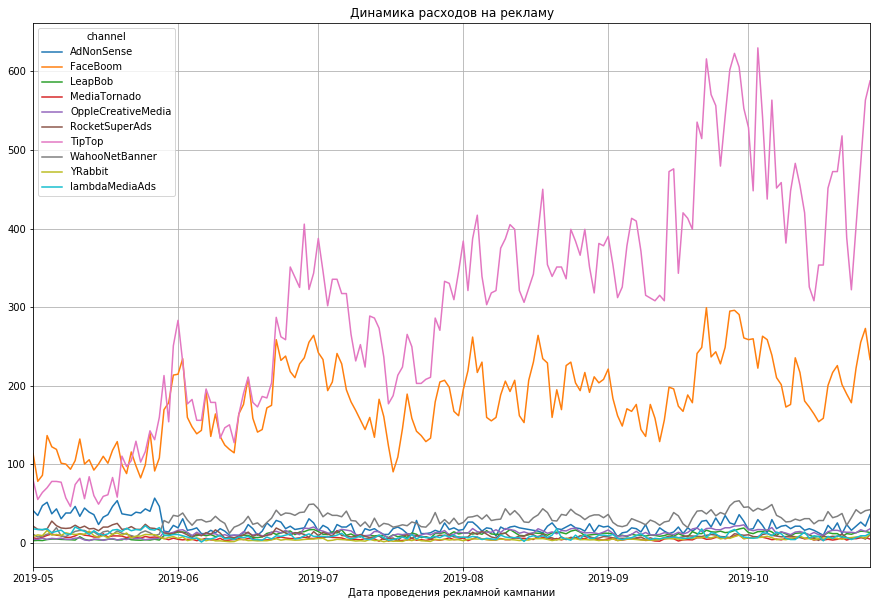

In [35]:
report.plot(grid=True, figsize=(15, 10))
plt.xlabel('Дата проведения рекламной кампании')
plt.title('Динамика расходов на рекламу')
plt.show()

Как и из предыдущей таблице из графика видно что наибольшие раходы на рекламу по каналам на каналы TipTop и FaceBoom, и пик этих расходов приходится примерно на середину сентября-начало октября

## Стоимость привлечения пользователей.

В таблице profiles  у нас уже рассчитана средняя стоимость привлечения каждого пользователя

CAC, или Customer Acquisition Cost, — стоимость привлечения одного клиента. Сумма денег, в которую компании обходится каждый новый клиент:

In [36]:
users_acq = profiles.query('channel != "organic"')['user_id'].count()
cac = sum_costs/users_acq
cac.round(3)

1.127

In [37]:
(profiles.groupby('channel').agg({'user_id': 'count','acquisition_cost': ['sum', 'mean']})
 .sort_values([('acquisition_cost', 'mean')], ascending=False)) 
# средняя стоимость привлечения 1 пользователя по каналам привлечения

user_id acquisition_cost      
                     count              sum  mean
channel                                          
TipTop               19561        54751.088 2.799
FaceBoom             29144        32444.714 1.113
AdNonSense            3880         3911.207 1.008
lambdaMediaAds        2149         1557.507 0.725
WahooNetBanner        8553         5150.997 0.602
RocketSuperAds        4448         1832.984 0.412
OppleCreativeMedia    8605         2151.417 0.250
YRabbit               4312          944.165 0.219
MediaTornado          4364          954.624 0.219
LeapBob               8553         1797.806 0.210
organic              56439            0.000 0.000

## Промежуточный вывод

- Общая сумма расходов на маркетинг за  весь исследуемый период составила 105 497
- Больше всего тратится на каналы TipTop и FaceBoom, в них же самая высокая стоимость привлечения 1 пользователя (в TipTopвыше средней на 1,376), но они же приводят к нам большинство платящих пользователей.

Установим момент и горизонт анализа данных. Предположим, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

# Общая окупаемость рекламы

In [38]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 
profiles = profiles.query('channel != "organic"') # исключаем органических пользователей

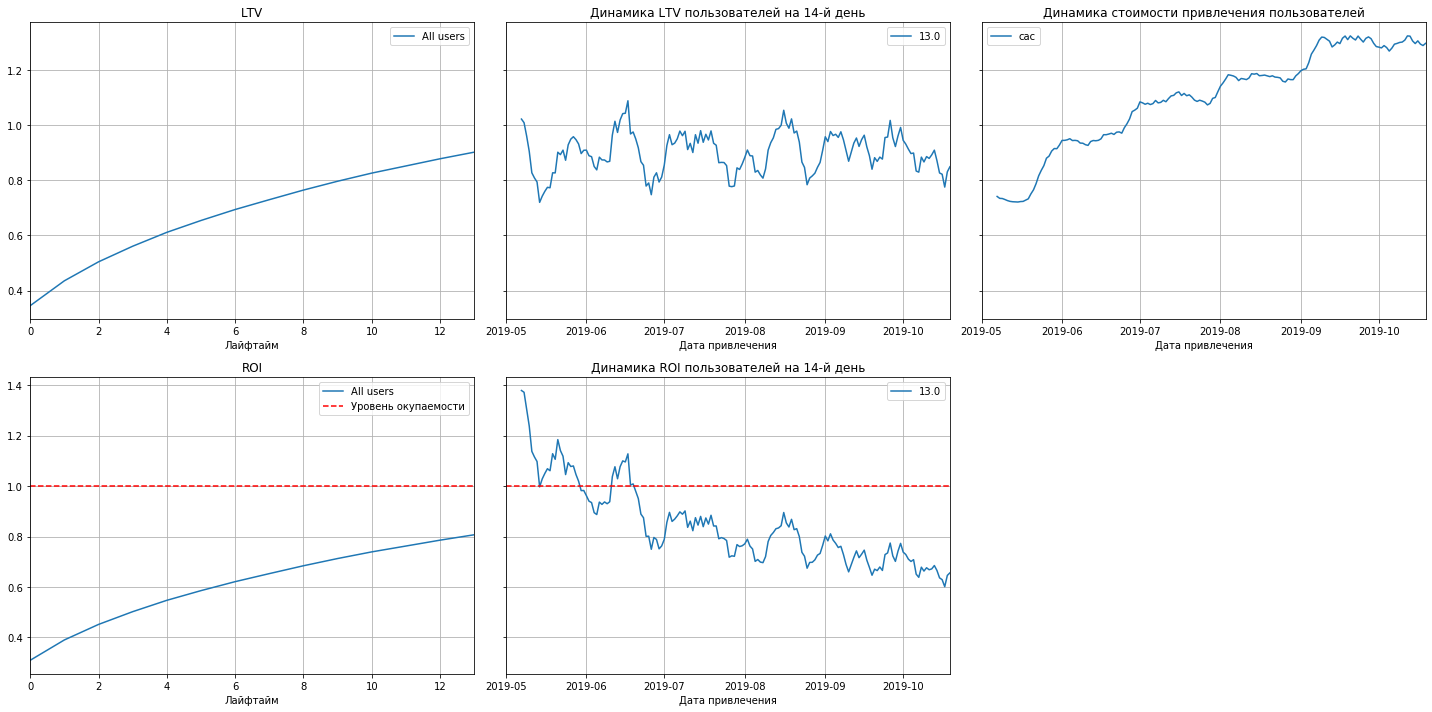

In [39]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:

    ROI даже не приближается к "точке безубыточности" на 14 день, по пользователям пришедшим в мае и июне реклама даже окупается
    CAC растет, расходы на рекламу увеливаются.
    Показатель LTV так же стабильно растет

In [40]:
result_raw,  result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'])
sum_costs = result_raw['acquisition_cost'].sum()
sum_revenue = result_raw['revenue'].sum()
print(f'Разница между выручкой от платных пользователей и расходами на рекламу - {sum_revenue - sum_costs:.0f}')

Разница между выручкой от платных пользователей и расходами на рекламу - 32521


## Окупаемость рекламы с разбивкой по устройствам

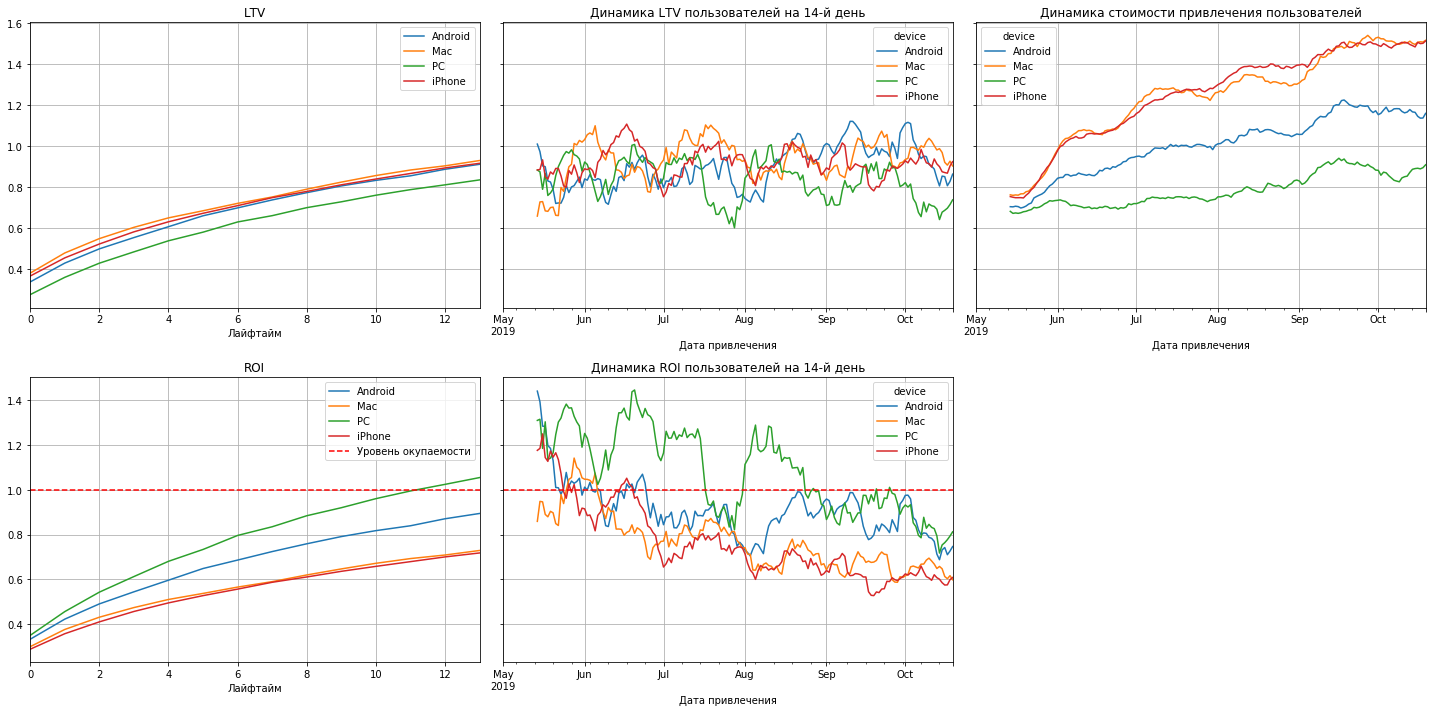

In [41]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Окупаются у нас пользователи PC, не окупаются iPhone и Mac, Android где то в середине, но все равно не окупается

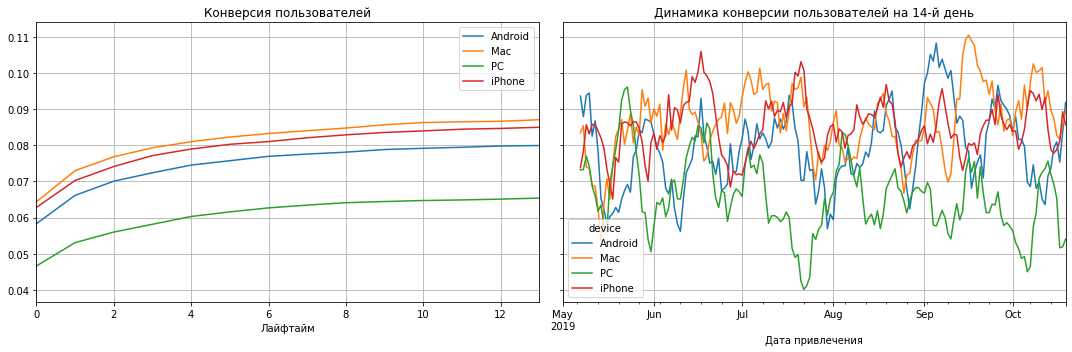

In [42]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

При этом конверсия iPhone и Mac выше остальных, и даже PC который окупается в отличие от них. Дело не в конверсии

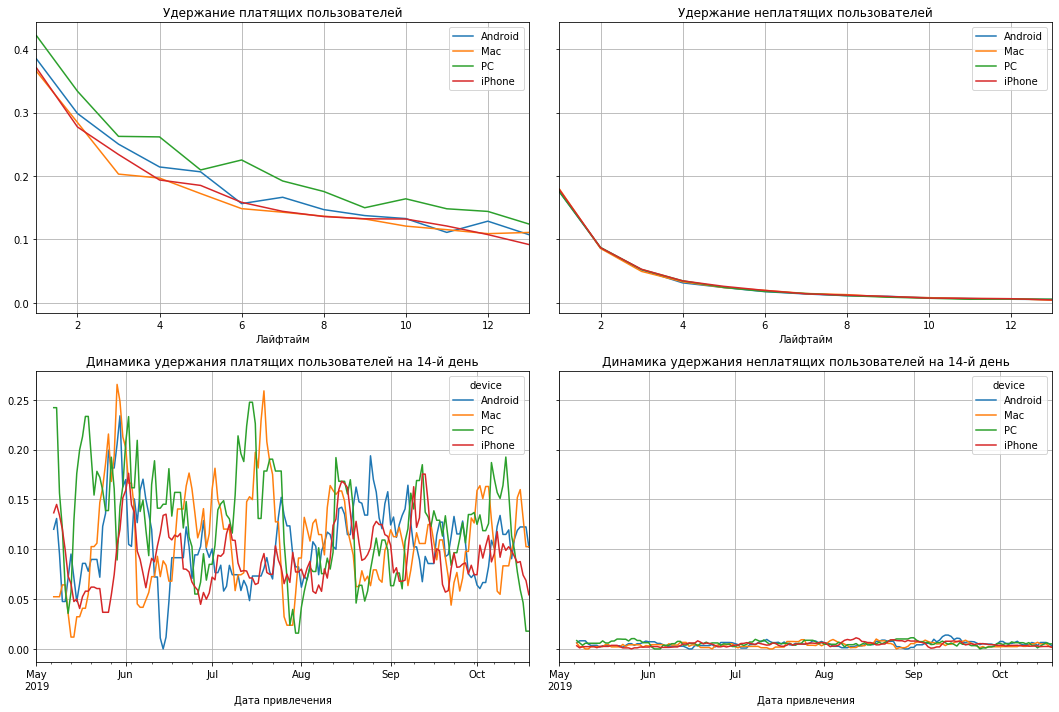

In [43]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание несколько ниже, но не значительно

## Окупаемость рекламы с разбивкой по странам

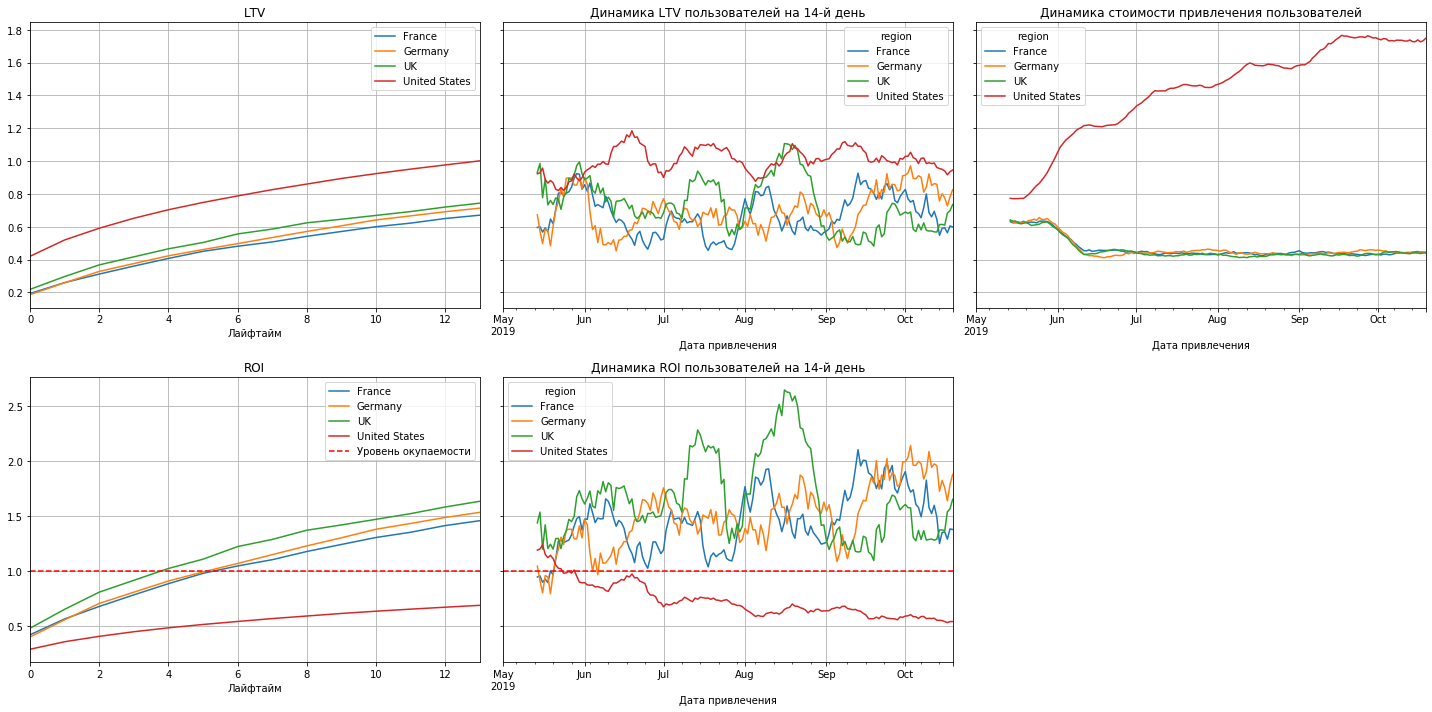

In [44]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Похоже у нас проблема в США, денег туда вливается так много, что они совсем не окупаются

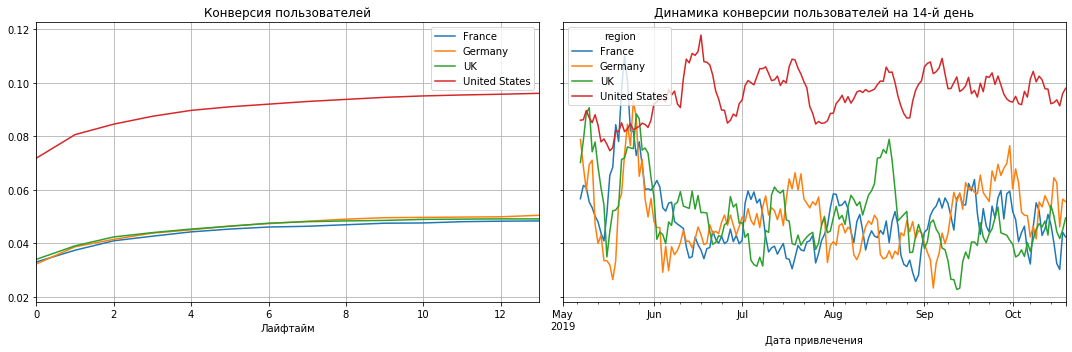

In [45]:
# смотрим конверсию 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

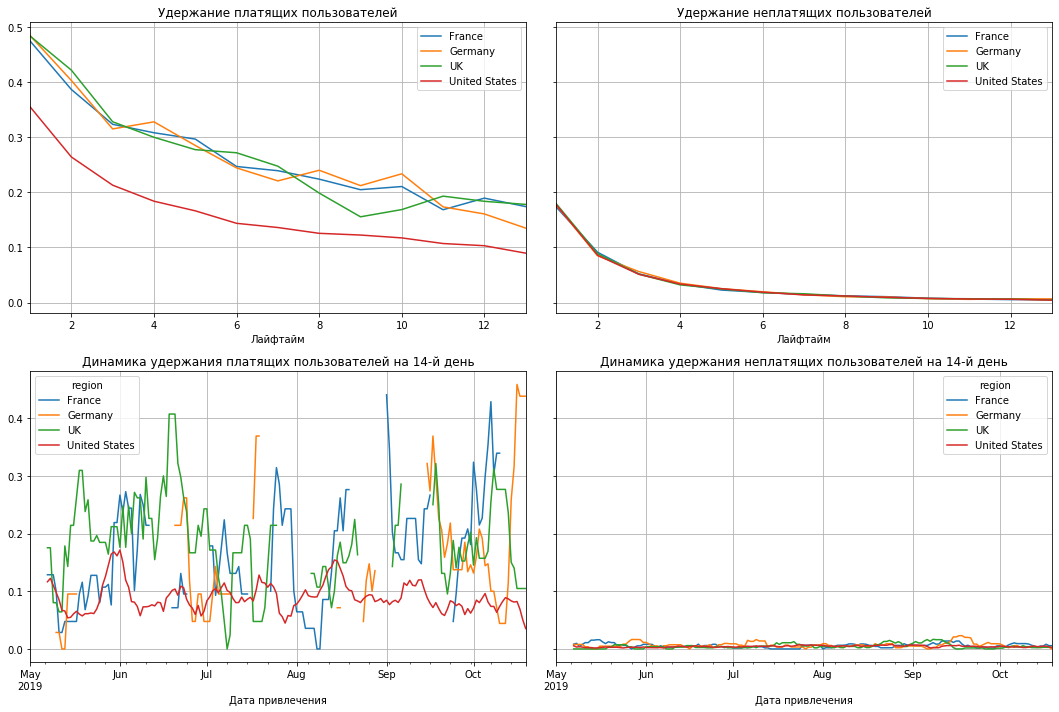

In [46]:
# смотрим удержание 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Конверсия США выделяется в хорошую сторону на фоне остальных стран, чего нельзя сказать об удержании

## Окупаемость рекламы с разбивкой по рекламным каналам

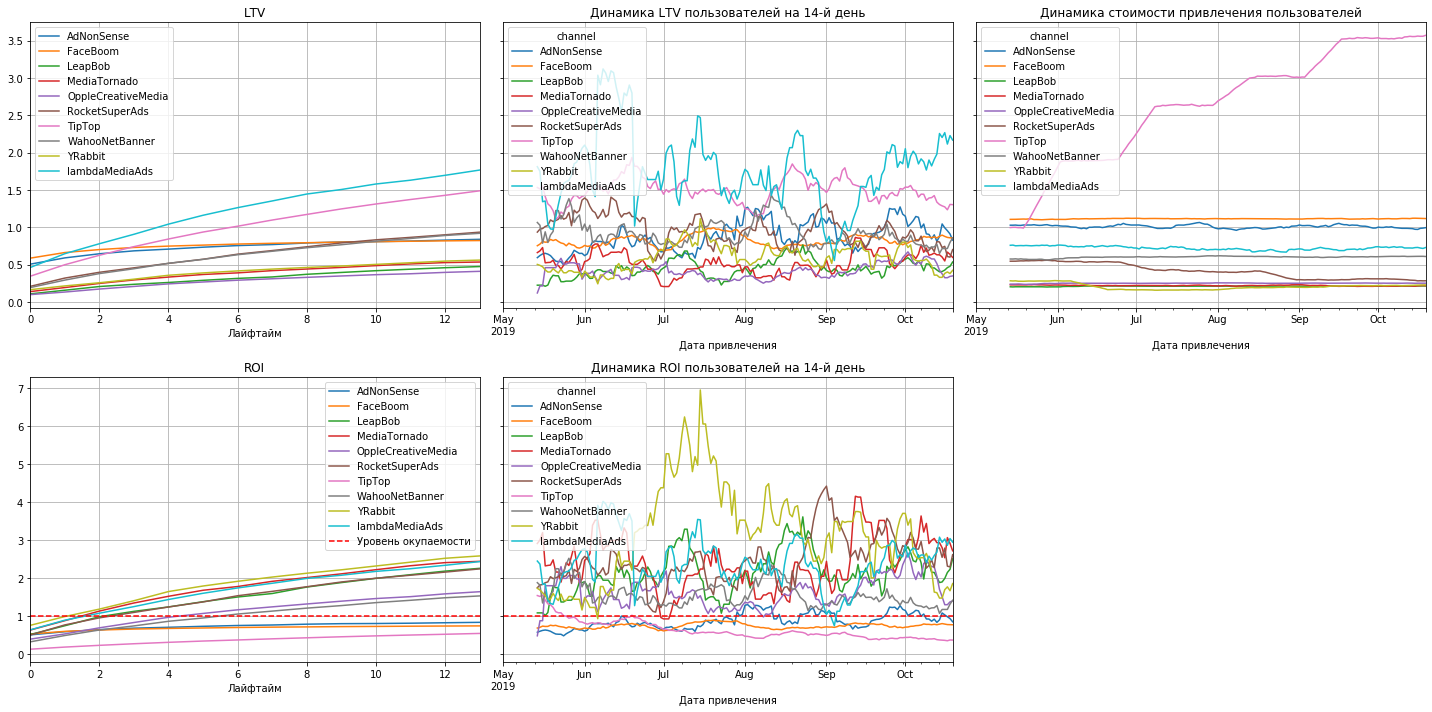

In [47]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

TipTop своих денег явно не оправдывает, FaceBoom тоже а самые лучшие показатели окупаемости у YRabbit (особенно в июле)

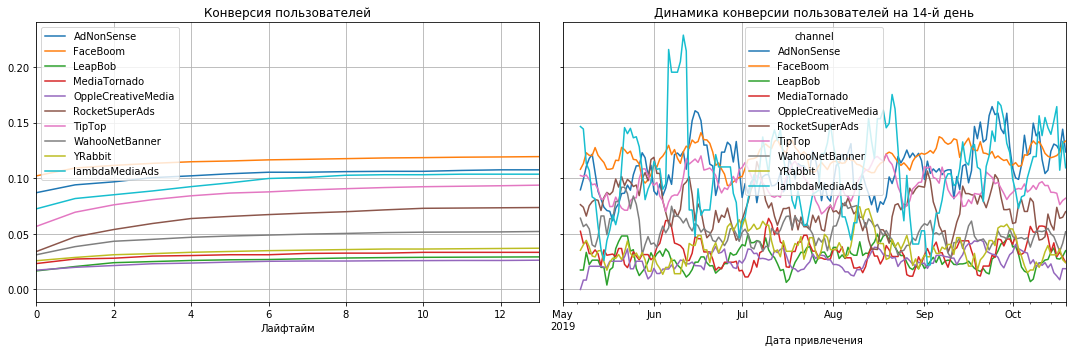

In [48]:
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

У FaceBoom очень хорошая конверсия, TipTop тоже не в аутсайдерах

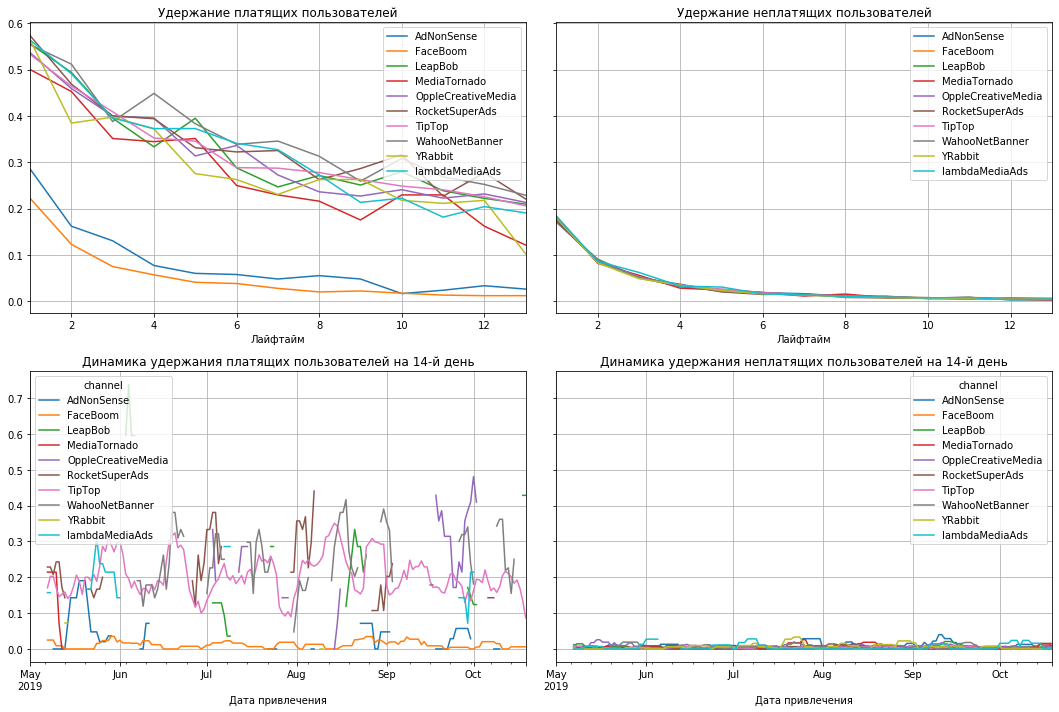

In [49]:
# смотрим удержание 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

In [1]:
report = result_raw.groupby('channel').agg({'user_id': ['nunique'], 'acquisition_cost': 'sum', 'revenue': 'sum'})
report['profit'] = report['revenue']-report['acquisition_cost']
report['profit_per_user']=(report['profit']/report[('user_id', 'nunique')]).round(3)
report.style.bar(subset=['profit'],
      align='mid',
      color=['coral', 'yellowgreen'],
      vmin=report['profit'].min(),
      vmax=report['profit'].max()
     )


NameError: name 'result_raw' is not defined

Итак каналы в которые мы вкладываем больше всего денег (FaceBoom и TipTop), приносят нам убытки. Хотя конверсия их и высока, однако удержание по крайней мере у FaceBoom на уровне неплатящих пользователей. Кроме того почти на 0 эффективность канала AdNonSense	

In [51]:
result_raw.query('channel in ["FaceBoom", "TipTop"]').groupby(['channel', 'region']).agg({'user_id': ['nunique'], 'acquisition_cost': 'sum', 'revenue': 'sum'})

,,user_id,acquisition_cost,revenue
,,nunique,sum,sum
channel,region,,,
FaceBoom,United States,27544,31917.416,24384.140
TipTop,United States,18498,78717.538,68440.980


Этим же объясняются проблема с окупаемостью в США, эти каналы работают только там. НО возможно с каналами все в порядке и просто наше приложение американцам не нравится?

In [52]:
result_raw.query('region == "United States"').groupby(['channel']).agg({'user_id': ['nunique'], 'acquisition_cost': 'sum', 'revenue': 'sum'})

,user_id,acquisition_cost,revenue
,nunique,sum,sum
channel,,,
FaceBoom,27544,31917.416,24384.140
MediaTornado,4167,1111.929,5637.520
RocketSuperAds,4251,2604.493,11443.630
TipTop,18498,78717.538,68440.980
YRabbit,4102,1104.156,6070.600


Нет, там имеются и другие каналы, которые более успешны, например RocketSuperAds, значит дело не в предубежденности американцев к нашему приложению	

Но можно ли этим неудачным выбором каналов объяснить неудачи с пользователями iPhone и Mac?

In [53]:
result_raw.query('device in ["iPhone", "Mac"]').groupby(['device','channel']).agg({'user_id': ['nunique'], 'acquisition_cost': 'sum', 'revenue': 'sum'})

user_id acquisition_cost   revenue
                          nunique              sum       sum
device channel                                              
Mac    AdNonSense             397          424.949   331.370
       FaceBoom              6881         7961.856  6154.800
       LeapBob                826          210.060  1025.990
       MediaTornado          1058          291.283  1676.890
       OppleCreativeMedia     838          252.612  1118.020
       RocketSuperAds        1083          677.983  3219.090
       TipTop                4559        18785.263 14938.690
       WahooNetBanner         816          657.417  1685.840
       YRabbit               1054          283.800  1648.950
       lambdaMediaAds         235          277.750   921.340
iPhone AdNonSense             764          820.209   740.610
       FaceBoom             12261        14162.503 10339.020
       LeapBob               1600          383.405  1475.370
       MediaTornado          1846          489.232  2404.560
       OppleCreativeMedia    1600          477.220  1844.390
       RocketSuperAds        1851         1182.576  5658.560
       TipTop                8363        35109.671 30326.120
       WahooNetBanner        1614         1290.614  3205.950
       YRabbit               1771          470.940  2268.620
       lambdaMediaAds         416          556.991  2016.090

Если говорить о платных каналах то больше всего пользователей iPhone и Mac приходит как раз из TipTop и FaceBoom, а по FaceBoom очень плохое удержание пользователей

## Промежуточный вывод

1.  Реклама, направленная на привлечение пользователей в целом окупается, прибыль стоставляет 32520
2.  Негативное влияние на эффект от рекламы оказывают:
- каналы привлечения TipTop, FaceBoom и AdNonSense, за счет завышенной стоимости привлечения
- пользователи из США а так же пользователи iPhone и Mac, поскольку большей частью приходят именно через каналы TipTop, FaceBoom
- кроме того по каналам FaceBoom и AdNonSense наблюдаются большие проблемы с удержанием платящих пользователей

# Общий вывод

**В результате исследовательского анализа данных определено:**
- Минимальная и максимальная даты привлечения пользователей: 2019-05-01 и 2019-10-27
- Большинство пользователей приложения из США и на них же приходится большая доля и количество платящих пользователей
- Наибольшее количество пользователей использует iPhone и Android, однако доля платящих пользователей выше у Mac, при том что количество платящих все же выше у iPhone
- Наибольшее количество пользователей приходит из каналов organic, FaceBoom и TipTop
- Набольшая доля платящих пользователей и количество платящих пользователей приходят из каналов FaceBoom и TipTop
___
- Общая сумма расходов на маркетинг за  весь исследуемый период составила 105 497
- Больше всего тратится на каналы TipTop и FaceBoom, в них же самая высокая стоимость привлечения 1 пользователя (в TipTop выше средней на 1,376), но они же приводят к нам большинство платящих пользователей.

**Что касается окупаемости рекламы:**
1.  Реклама, направленная на привлечение пользователей в целом, окупается, прибыль составляет 32520 (без учета горизонта анализа в 14 дней)
2.  Негативное влияние на эффект от рекламы оказывают:
- каналы привлечения TipTop, FaceBoom и AdNonSense, за счет завышенной стоимости привлечения
- пользователи из США а так же пользователи iPhone и Mac, поскольку большей частью приходят именно через каналы TipTop, FaceBoom
- кроме того по каналам FaceBoom и AdNonSense наблюдаются большие проблемы с удержанием платящих пользователей
___
**Рекомендации**
1. Провести переговоры с TipTop, FaceBoom и AdNonSense о снижение стоимости привлечения одного уникального пользователя (особенно по TT надо снижать как минимум на 0.55 что бы выходить в 0)
2. Необходимо изменить политику по рынку США, возможно больше взаимодействовать с такими каналами как RocketSuperAds и YRabbit	которые показывают там неплохие результаты
3. Обратить внимание на проблемы с удержанием пользователей США которые возникли начиная с конца июня, возможно это так же некачественная реклама от FaceBoom